# Assignment 2
## Breast cancer detection

In [1]:
# Checking if the correct env is being used

import sys

print(sys.executable)

/home/aiman/anaconda3/envs/MLbegins/bin/python3


In [2]:
import pandas as pd, matplotlib as plt

In [3]:
frame = pd.read_csv("02_breast-cancer.csv")
frame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# checking for null values
frame.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# checking for the categorical columns
catcols = frame.select_dtypes(exclude = ["number"]).columns
catcols

Index(['diagnosis'], dtype='object')

In [6]:
# checking out the values of the categorical columns
frame["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
# replacing with numerical values
NumberAssign = {"M":1, "B":0}
frame["diagnosis"].replace(NumberAssign, inplace = True)
frame["diagnosis"]

/tmp/ipykernel_1033699/3381092083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame["diagnosis"].replace(NumberAssign, inplace = True)
/tmp/ipykernel_1033699/3381092083.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frame["diagnosis"].replace(NumberAssign, inplace = True)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [8]:
# categorical columns' values changed
frame["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [9]:
# drop the unnecessary column
frame.drop("id", axis = 1, inplace = True)

## Visualizing relations between the target and the features.

In [10]:
import matplotlib.pyplot as plt

In [11]:
frame.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Mean Radii

/tmp/ipykernel_1033699/157199928.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diag_radi = frame.groupby( [pd.cut(frame["radius_mean"], bins=bins, labels=labels, include_lowest=True), "diagnosis"]  ).size().unstack()


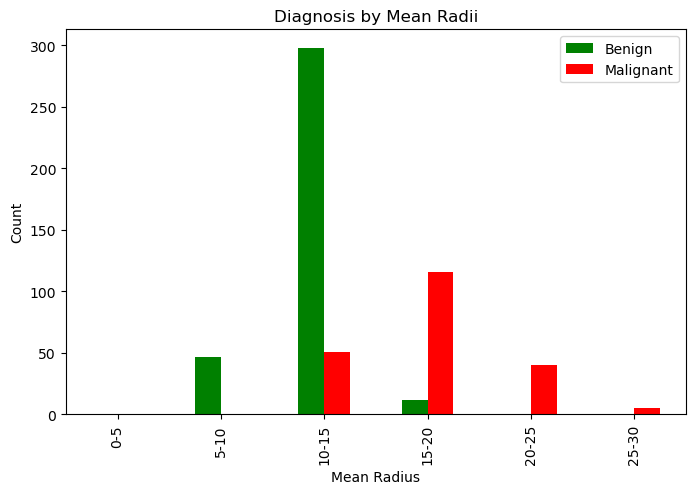

In [12]:
# Plot 1: Diagnosis by Mean Radius

# Define bins and labels
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust ranges as needed
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30"]  # Labels for each bin

diag_radi = frame.groupby( [pd.cut(frame["radius_mean"], bins=bins, labels=labels, include_lowest=True), "diagnosis"]  ).size().unstack()
diag_radi = diag_radi[[0, 1]]

# diag_radi =  frame.groupby(["radius_mean", "diagnosis"]).size().unstack()

diag_radi.plot( kind = "bar", figsize =(8,5), color = ["green", "red"] )
plt.title("Diagnosis by Mean Radii")
plt.xlabel("Mean Radius")
plt.ylabel("Count")
plt.legend(labels = ["Benign", "Malignant"])
plt.show()

#### Standar Error of the Cell Nuclei

/tmp/ipykernel_1033699/2885685444.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diag_area = frame.groupby( [pd.cut(frame["area_se"], bins=bins, labels=labels, include_lowest=True), "diagnosis"]  ).size().unstack()


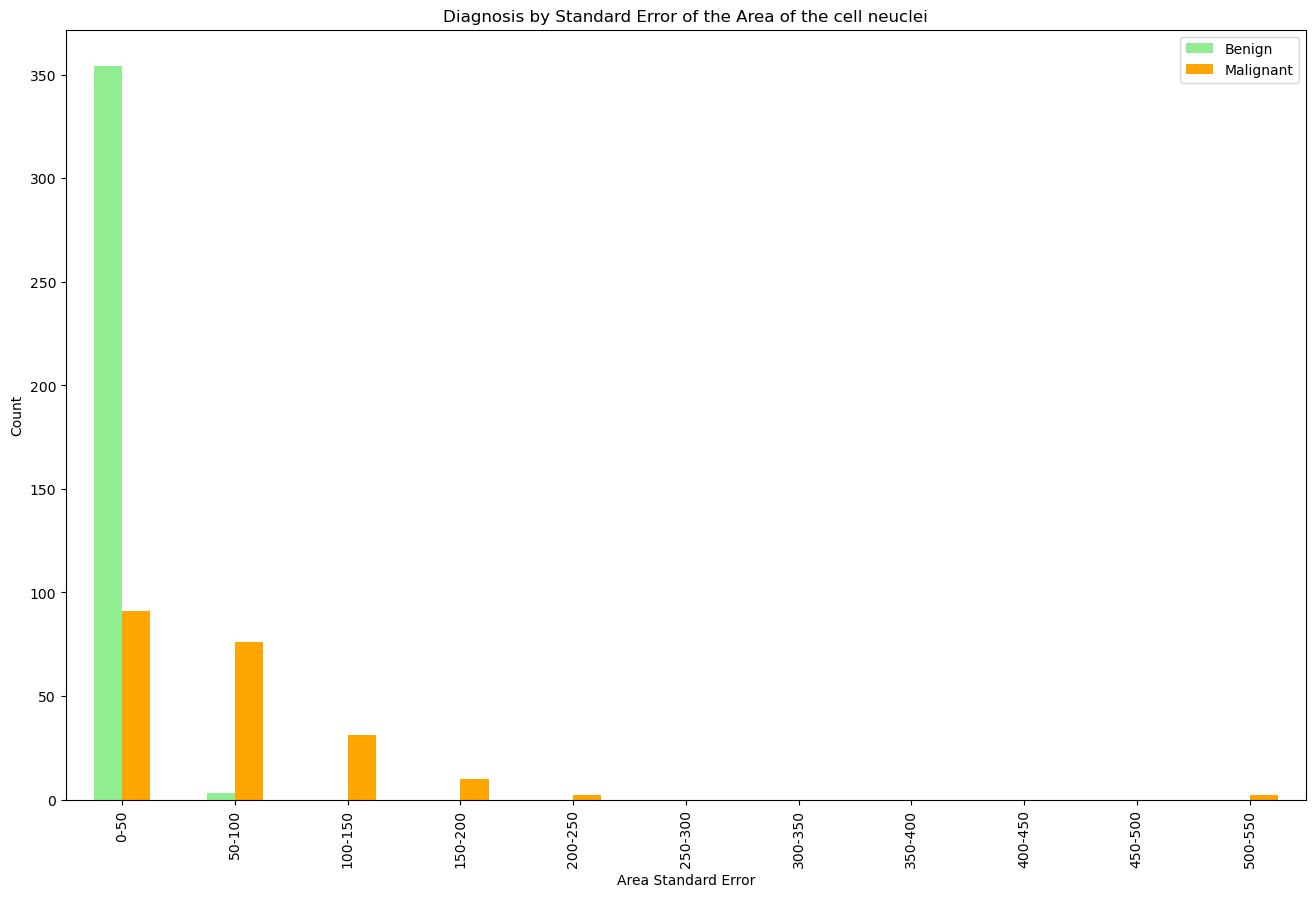

In [13]:
# Plot 2: Diagnosis by Standard Error of the Area of the cell neuclei

# Define bins and labels

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]  # Adjust ranges as needed
labels = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550"]  # Labels for each bin

diag_area = frame.groupby( [pd.cut(frame["area_se"], bins=bins, labels=labels, include_lowest=True), "diagnosis"]  ).size().unstack()
diag_area = diag_area[[0, 1]]

diag_area.plot( kind = "bar", figsize =(16,10), color = ["lightgreen", "orange"] )
plt.title("Diagnosis by Standard Error of the Area of the cell neuclei")
plt.xlabel("Area Standard Error")
plt.ylabel("Count")
plt.legend(labels = ["Benign", "Malignant"])
plt.show()

### Mean Symmetry of the Cells

/tmp/ipykernel_1033699/362432178.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diag_symmean = frame.groupby( [pd.cut(frame["symmetry_mean"], bins=bins, labels=labels, include_lowest=True), "diagnosis"]  ).size().unstack()


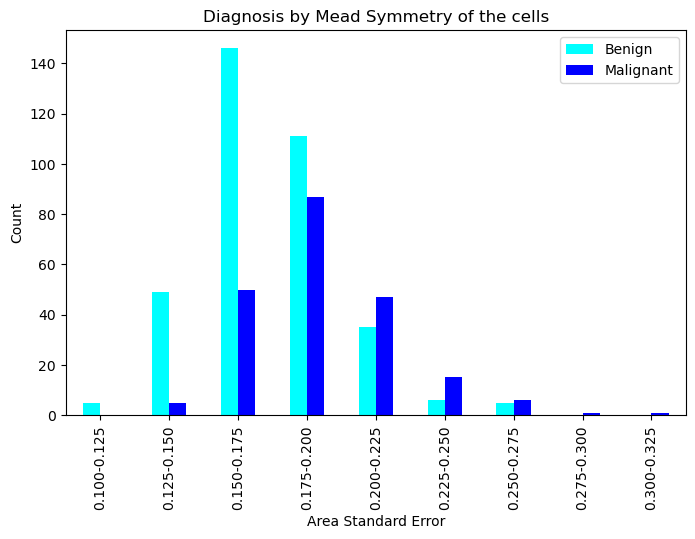

In [14]:

# Plot 3: Diagnosis by mean symmetry of the cell

# Define bins and labels

bins = [0.100, 0.125, 0.150, 0.175, 0.200, 0.225, 0.250, 0.275, 0.300, 0.325]  # Adjust ranges as needed
labels = ["0.100-0.125", "0.125-0.150", "0.150-0.175", "0.175-0.200", "0.200-0.225", "0.225-0.250", "0.250-0.275", "0.275-0.300", "0.300-0.325"]  # Labels for each bin

diag_symmean = frame.groupby( [pd.cut(frame["symmetry_mean"], bins=bins, labels=labels, include_lowest=True), "diagnosis"]  ).size().unstack()
diag_symmean = diag_symmean[[0, 1]]

diag_symmean.plot( kind = "bar", figsize =(8,5), color = ["cyan", "blue"] )
plt.title("Diagnosis by Mead Symmetry of the cells")
plt.xlabel("Area Standard Error")
plt.ylabel("Count")
plt.legend(labels = ["Benign", "Malignant"])
plt.show()

## Split, Train, Test

In [15]:
# features and target

x = frame.drop("diagnosis", axis = 1)
y = frame["diagnosis"]



In [31]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 42)

print(len(xtrain), len(xtest), len(ytrain), len(ytest))

398 171 398 171


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain, ytrain)

/home/aiman/anaconda3/envs/MLbegins/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Scores

#### Accuracy

In [33]:
model.score( xtest, ytest)

0.9707602339181286

#### Precisoin

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

ypred = model.predict(xtest)
precision = precision_score(ytest, ypred)
precision

0.9833333333333333

#### Recall

In [35]:
recall = recall_score( ytest, ypred)
recall

0.9365079365079365

#### F1 Score

In [36]:
f1score = f1_score(ytest, ypred)
f1score

0.959349593495935

#### Confusion Matrix

In [37]:
CM = confusion_matrix( ytest, ypred)
CM

array([[107,   1],
       [  4,  59]])